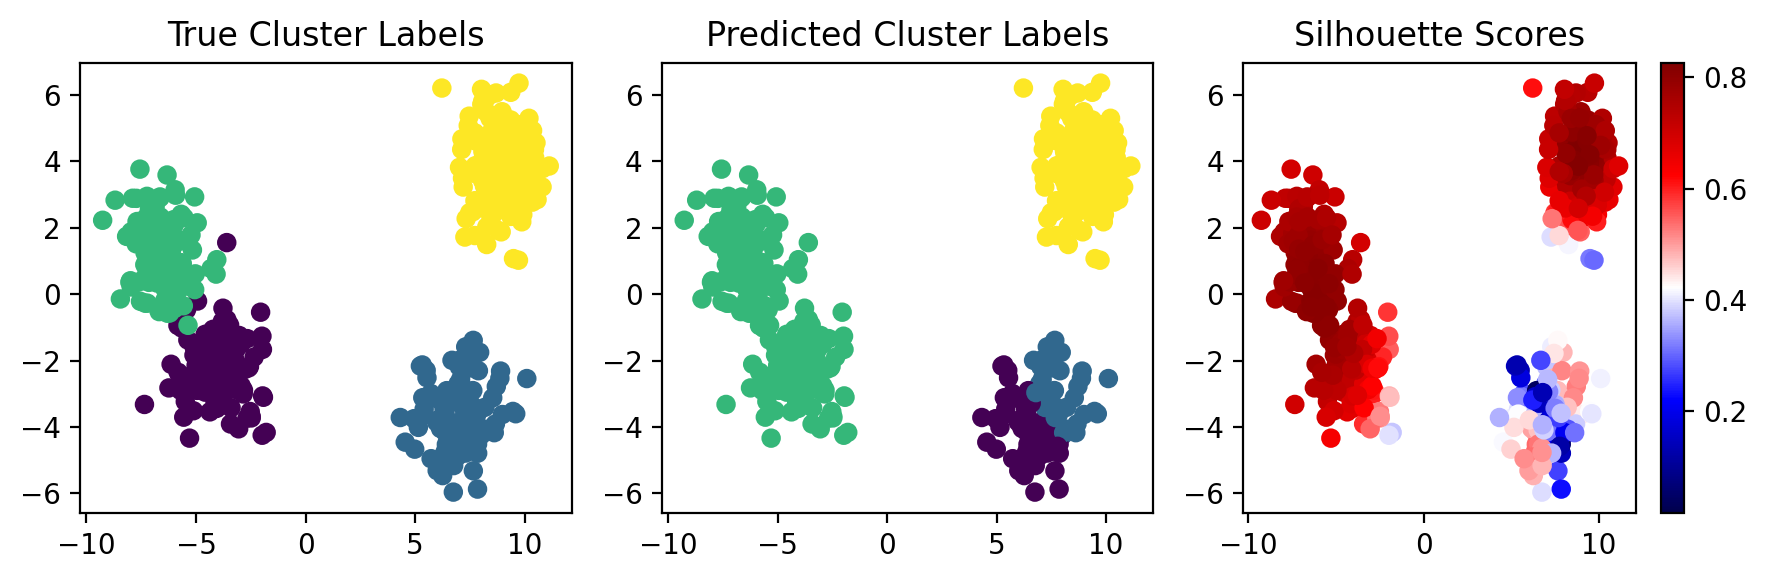

In [1]:
import numpy as np
from cluster import (
        KMeans, 
        Silhouette, 
        make_clusters,
        plot_clusters,
        plot_multipanel)


def main():

    # create tight clusters
    clusters, labels = make_clusters(scale=0.3)
    plot_clusters(clusters, labels, filename="figures/tight_clusters.png")

    # create loose clusters
    clusters, labels = make_clusters(scale=2)
    plot_clusters(clusters, labels, filename="figures/loose_clusters.png")

    """
    uncomment this section once you are ready to visualize your kmeans + silhouette implementation
    """
    clusters, labels = make_clusters(k=4, scale=1)
    km = KMeans(k=4)
    km.fit(clusters)
    pred = km.predict(clusters)
    scores = Silhouette().score(clusters, pred)
    plot_multipanel(clusters, labels, pred, scores)
    

if __name__ == "__main__":
    main()

In [11]:
import numpy as np
from scipy.spatial.distance import cdist
from scipy.stats import gmean
from cluster import make_clusters
clusters = make_clusters(n = 500)
mat = np.random.uniform(0, 100, (1000,2))
k = 8
tol = 0.000001
max_iter = 100

In [ ]:
print(mat)

In [12]:
#initializing k random centroids 
centroids = np.empty((0,2))
for _ in range(k):
    centroid = np.array([[np.random.uniform(mat.min(), mat.max()), np.random.uniform(mat.min(), mat.max())]])
    centroids = np.append(centroids, centroid, axis = 0)

iter_count = 0
centroid_delta = float("inf")

#begin loop until max iterations or centroid_delta approaches tolerance
while iter_count < max_iter and centroid_delta > tol:
    #initializing and resetting index_dict to track centroid assignment
    index_dict = {i: [] for i in range(k)}
    #calculating distances from matrix to centroid points
    distances = cdist(mat, centroids, metric = 'euclidean')
    #picks index of minimum distance
    bins = np.argmin(distances, axis = 1)
   
    #store index of each bin for assignment
    for i, value in enumerate(bins):
        index_dict[value].append(i)
    
    #initializing new centroids based off bin assignments
    new_centroids = np.empty_like(centroids)
    for key, indices in index_dict.items():
        if len(indices) > 0:
            new_centroids[key] = np.mean(mat[indices], axis = 0)
        #randomly initiate centroid if no points are assigned to it
        else:
            new_centroids[key] = np.array([np.random.uniform(mat.min(), mat.max()), np.random.uniform(mat.min(), mat.max())])
    
    #calculating difference between centroids and new centroids
    centroid_delta = np.linalg.norm(centroids - new_centroids)
    iter_count += 1
    #updating centroids
    centroids = new_centroids.copy()

[[43.1651536  51.95975103]
 [46.40915343 84.71796363]
 [79.05319814 54.18868929]
 [ 9.55931995 55.61639202]
 [15.80547152 20.73398681]
 [71.1720662  16.99557703]
 [32.48939808 18.0445022 ]
 [88.58007431 84.93078671]] 38.67046323770894 1
[[45.450607   50.82265179]
 [42.94896068 85.32120096]
 [81.50128699 52.28816207]
 [11.89332499 63.32652426]
 [12.03498261 19.61969734]
 [75.56879357 16.45654966]
 [38.39340795 16.27068623]
 [83.65364186 84.53480292]] 13.815291080367672 2
[[46.85121705 49.79840468]
 [42.08507748 85.71840136]
 [82.53664212 52.16288496]
 [12.78885918 66.65594914]
 [12.07865833 21.55051322]
 [78.04996431 15.84943142]
 [41.77995521 15.92710855]
 [80.87194467 84.30285371]] 6.820755462968472 3
[[47.54686344 50.08812537]
 [42.18798181 85.43688396]
 [83.03419327 52.23366981]
 [13.14621519 68.34433019]
 [12.74359249 22.86488206]
 [79.9360043  16.26310777]
 [44.68613649 14.98243166]
 [79.73909255 84.79934312]] 4.544748884628198 4
[[47.26290056 49.68038976]
 [42.04688769 85.5591034

In [20]:
def make_centroids(array, k):
    centroids = np.empty((0,2))
    for _ in range(k):
        centroid = np.array([[np.random.uniform(array.min(), array.max()) , np.random.uniform(array.min(), array.max())]])
        centroids = np.append(centroids, centroid, axis = 0)
        
    return centroids

In [21]:
centroids = make_centroids(array, 3)

In [ ]:
centroids

In [23]:
from scipy.stats import gmean
from scipy.spatial.distance import cdist

In [ ]:
'''i want to input a point, and for each reference point, calculate a distance

I want to store that distance in a list, based on the index that was used by the calculating point

take the min

make a 1 d array where the index is the index of the point and the value is the k '''

In [25]:

distances = cdist(array, centroids, metric = 'euclidean')

In [ ]:
distances

In [27]:
bins = np.argmin(distances, axis = 1)

In [ ]:
bins

In [29]:
index_dict = {}

for i, value in enumerate(bins):
    if value not in index_dict:
        index_dict[value] = []

    index_dict[value].append(i)

In [ ]:
index_dict

In [31]:
max_index = max(index_dict.keys())

In [32]:
new_centroid = np.empty((max_index+1, 2))

In [33]:
for key, indices in index_dict.items():
    array_index = array[indices]

    if len(array_index) > 0:
        new_centroid[key] = gmean(array_index)

In [ ]:
new_centroid